In [889]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV,train_test_split,validation_curve,learning_curve
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA, FastICA
from scipy.stats import kurtosis
from sklearn.tree import DecisionTreeClassifier
from sklearn.manifold import Isomap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import category_encoders
from sklearn.metrics import accuracy_score, confusion_matrix
#from keras.models import Sequential
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from tqdm import tqdm
import matplotlib.cm as cm
from sklearn import random_projection
import numpy as np 
import time 
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.mixture import GaussianMixture as GMM 
from sklearn.metrics import silhouette_samples, silhouette_score

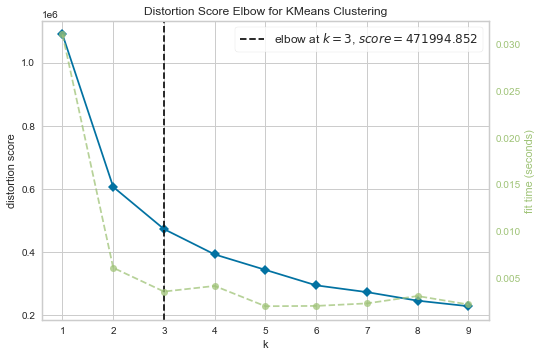

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [890]:
pd.set_option('display.max_rows', None)
data=pd.read_csv('heart.csv')
x=data.drop(['output'],axis=1)
y=data['output']
scale = MinMaxScaler()
scaled_features = scale.fit_transform(x[x.columns])


# Create a new DataFrame 'newX' with scaled values
newX = x.copy()  # Make a copy of the original DataFrame
newX[x.columns] = scaled_features

x_train,x_test,y_train,y_test=train_test_split(newX,y,test_size=0.2,random_state=1)
km = KMeans(random_state=42)
vis=KElbowVisualizer(km,k=(1,10))
vis.fit(x)
vis.show()


In [891]:

def silhouette_plot(algorithm,X,range_n_clusters):

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1) = plt.subplots(1)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = algorithm(n_clusters, random_state=2)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        '''print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )
 '''
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        if algorithm==KMeans:

            ax1.set_title("The silhouette plot for the various clusters:KMEANS")
        else:
            ax1.set_title("The silhouette plot for the various clusters:EM")

        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
       # colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
       # ax2.scatter( X.iloc[:, 3], X.iloc[:, 9], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
      #  )
'''
        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()
'''

'\n        # Labeling the clusters\n        centers = clusterer.cluster_centers_\n        # Draw white circles at cluster centers\n        ax2.scatter(\n            centers[:, 0],\n            centers[:, 1],\n            marker="o",\n            c="white",\n            alpha=1,\n            s=200,\n            edgecolor="k",\n        )\n\n        for i, c in enumerate(centers):\n            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")\n\n        ax2.set_title("The visualization of the clustered data.")\n        ax2.set_xlabel("Feature space for the 1st feature")\n        ax2.set_ylabel("Feature space for the 2nd feature")\n\n        plt.suptitle(\n            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"\n            % n_clusters,\n            fontsize=14,\n            fontweight="bold",\n        )\n\n    plt.show()\n'

In [892]:
def silhouette_printscore(algorithm,X,range_n_clusters):

    for n_clusters in range_n_clusters:

        clusterer = algorithm(n_clusters, random_state=2)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )


def drawcluster(algorithm,X,n_clusters,firstfeature,secondfeature,printindividual,y,titlename):
   
    clusterer = algorithm(n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(X)
    Cluster_label.append(cluster_labels)

    #centers = clusterer.cluster_centers_
    if printindividual:
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        plt.scatter(
            X[:, firstfeature], X[:,secondfeature ], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        plt.title("The visualization of the clustered data.")
        plt.xlabel("Feature space for the {} th feature".format(firstfeature))
        plt.ylabel("Feature space for the {} th feature".format(secondfeature))

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )
        plt.show()
    cluster_labels_df = pd.DataFrame(cluster_labels, columns=['cluster_labels'])


    combined_data = pd.concat([pd.DataFrame(X[:,0:5]), cluster_labels_df], axis=1)
    sns.pairplot(combined_data,hue='cluster_labels')
    plt.title(titlename, loc='center', pad=20)
    plt.subplots_adjust(top=0.9) 

    #sns.pairplot(comparedata,hue='cluster_labels')
    comparedata=pd.concat([y, cluster_labels_df], axis=1)
    print(comparedata.head())
    output_counts = comparedata.groupby('output')['cluster_labels'].value_counts()

    output_counts = output_counts.unstack()

    ax = output_counts.plot(kind='bar', stacked=False, rot=0)
    ax.set_xlabel('Output')
    ax.set_ylabel('Count')
    ax.set_title('Count of Cluster Label for Each True Label(Output)')
    plt.show()


In [893]:

def drawclustersnsonly(algorithm,X,n_clusters,y,titlename):
   
    clusterer = algorithm(n_clusters, random_state=2)
    cluster_labels = clusterer.fit_predict(X)
    Cluster_label.append(cluster_labels)

    cluster_labels_df = pd.DataFrame(cluster_labels, columns=['cluster_labels'])


    combined_data = pd.concat([X.iloc[:,0:9], cluster_labels_df], axis=1)
    sns.pairplot(combined_data,hue='cluster_labels')
    plt.title(titlename, loc='center', pad=20)
    plt.subplots_adjust(top=0.9) 

    comparedata=pd.concat([y, cluster_labels_df], axis=1)
    output_counts = comparedata.groupby('output')['cluster_labels'].value_counts()

    output_counts = output_counts.unstack()

    ax = output_counts.plot(kind='bar', stacked=False, rot=0)
    ax.set_xlabel('Output')
    ax.set_ylabel('Count')
    ax.set_title('Count of Cluster Label for Each True Label(Output)')
    plt.show()

In [894]:
silhouette_printscore(KMeans,newX,[2,3,4,5,6,7,8])
silhouette_printscore(GMM,newX,[2,3,4,5,6,7,8])


For n_clusters = 2 The average silhouette_score is : 0.25177965944683706
For n_clusters = 3 The average silhouette_score is : 0.2585169093415864
For n_clusters = 4 The average silhouette_score is : 0.2669088290192287
For n_clusters = 5 The average silhouette_score is : 0.23007825098325202
For n_clusters = 6 The average silhouette_score is : 0.23919941821824264
For n_clusters = 7 The average silhouette_score is : 0.2480986351721099
For n_clusters = 8 The average silhouette_score is : 0.19696971868301186
For n_clusters = 2 The average silhouette_score is : 0.25177965944683706
For n_clusters = 3 The average silhouette_score is : 0.25778783750403367
For n_clusters = 4 The average silhouette_score is : 0.2669088290192287
For n_clusters = 5 The average silhouette_score is : 0.22691098976964869
For n_clusters = 6 The average silhouette_score is : 0.23717510538565253
For n_clusters = 7 The average silhouette_score is : 0.24481827043142454
For n_clusters = 8 The average silhouette_score is : 0.

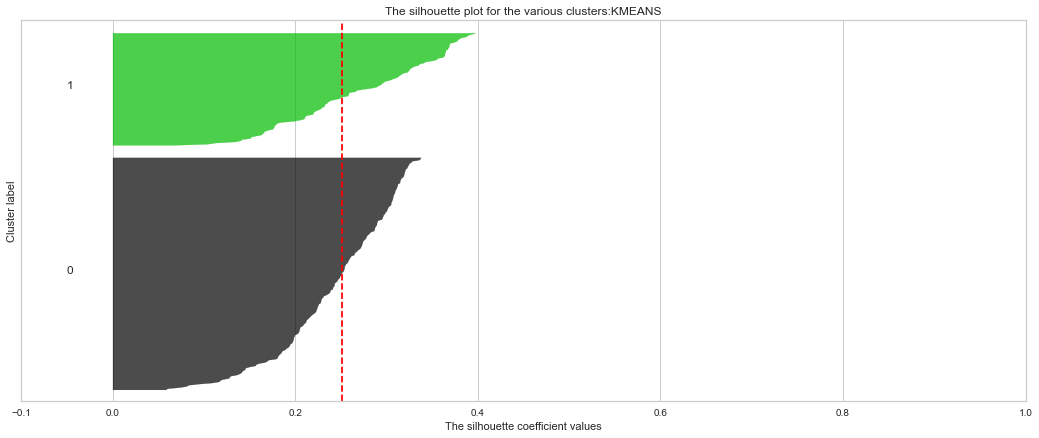

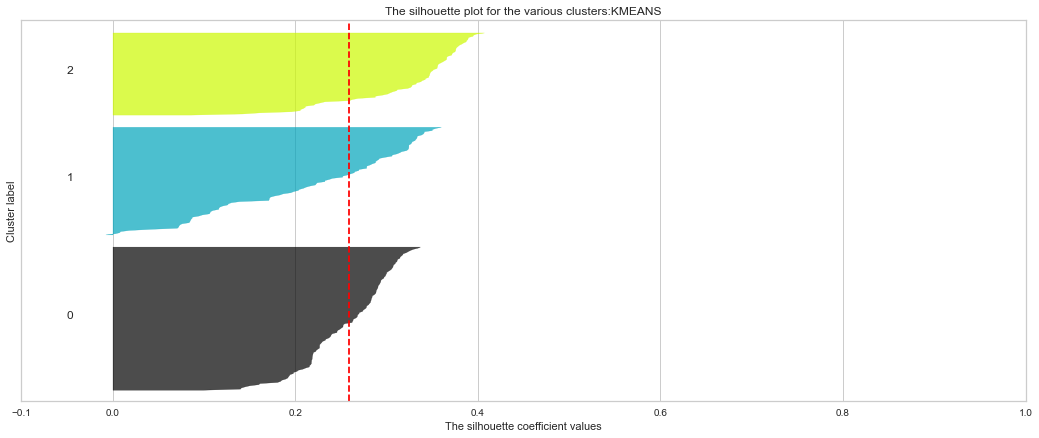

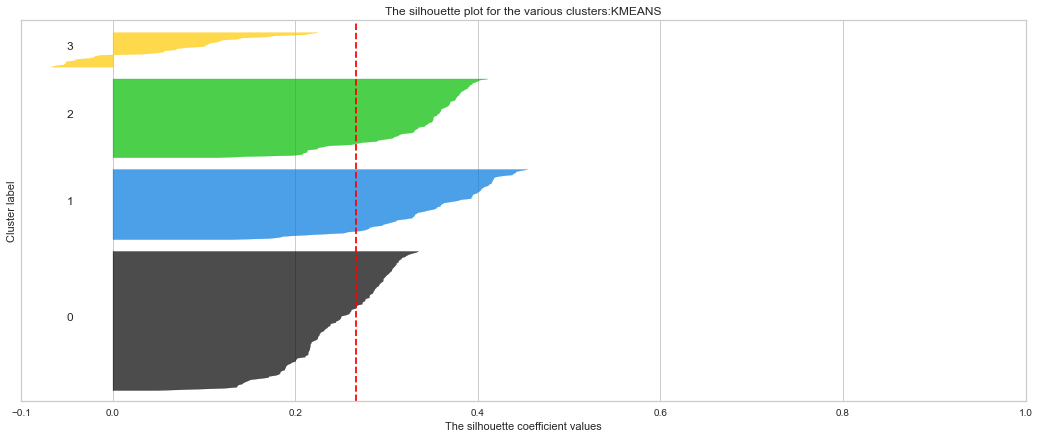

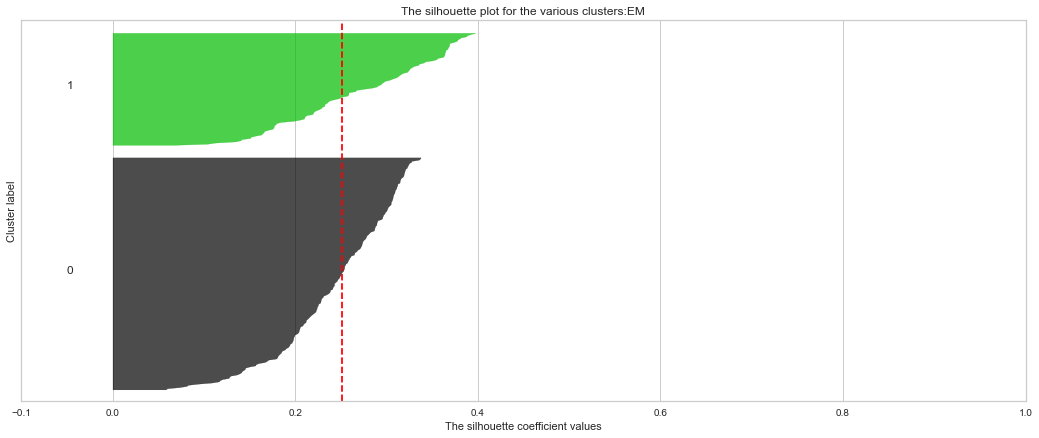

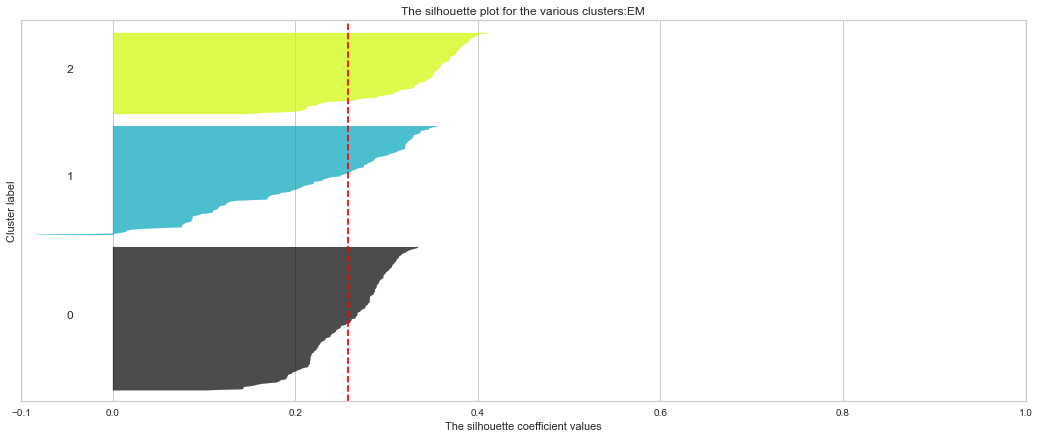

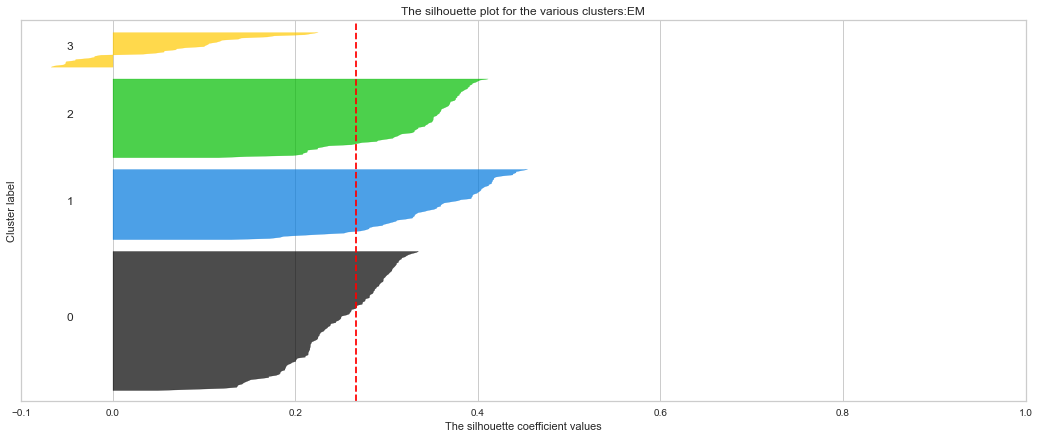

In [895]:
silhouette_plot(KMeans,newX,[2,3,4])
silhouette_plot(GMM,newX,[2,3,4])

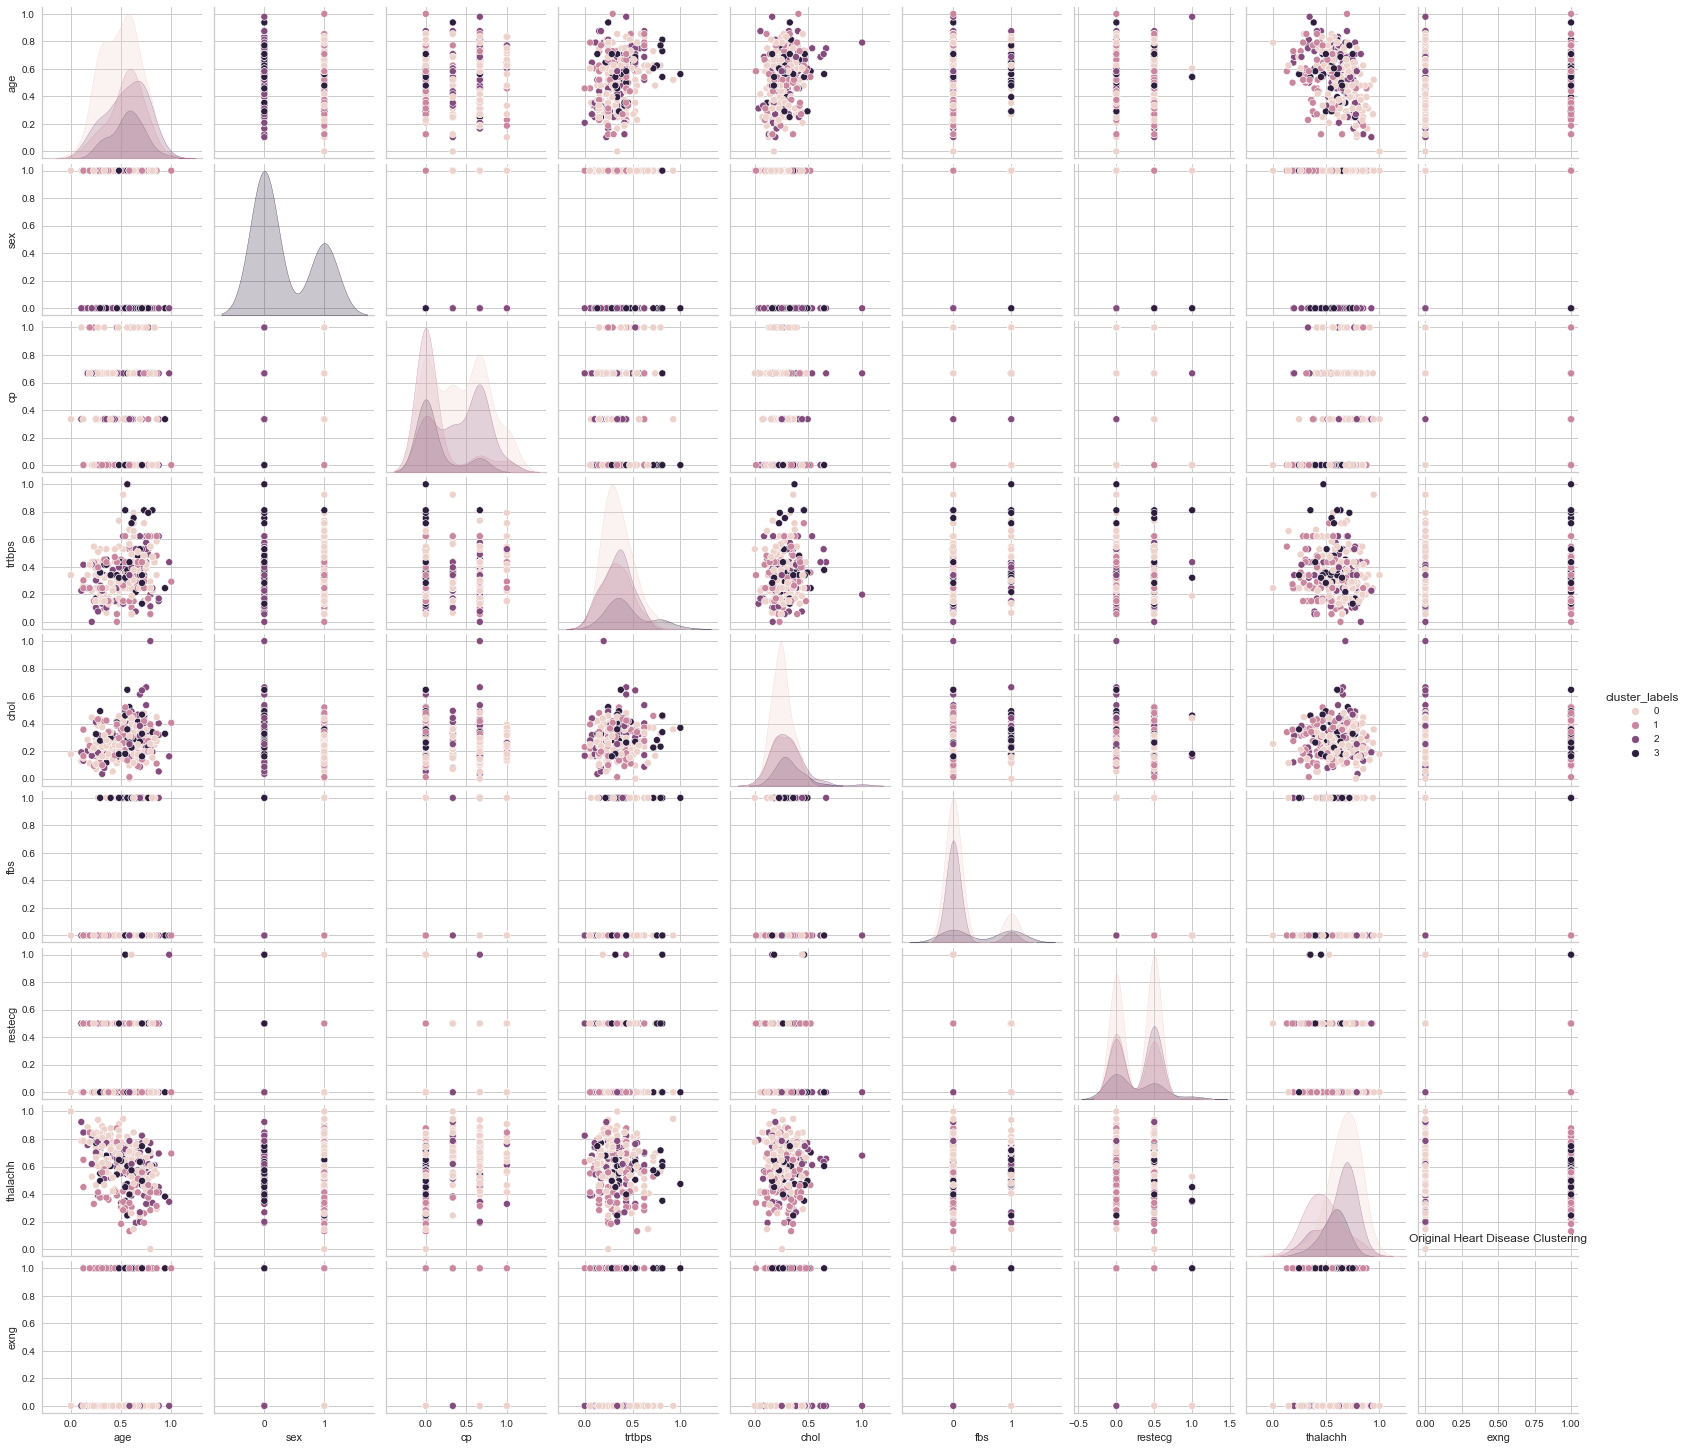

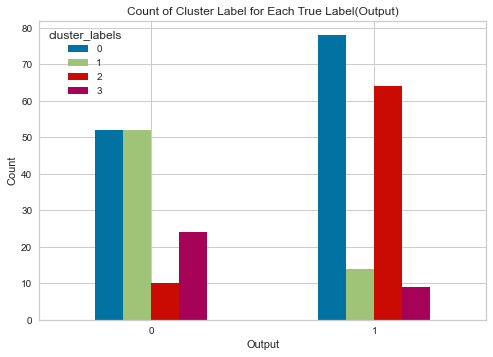

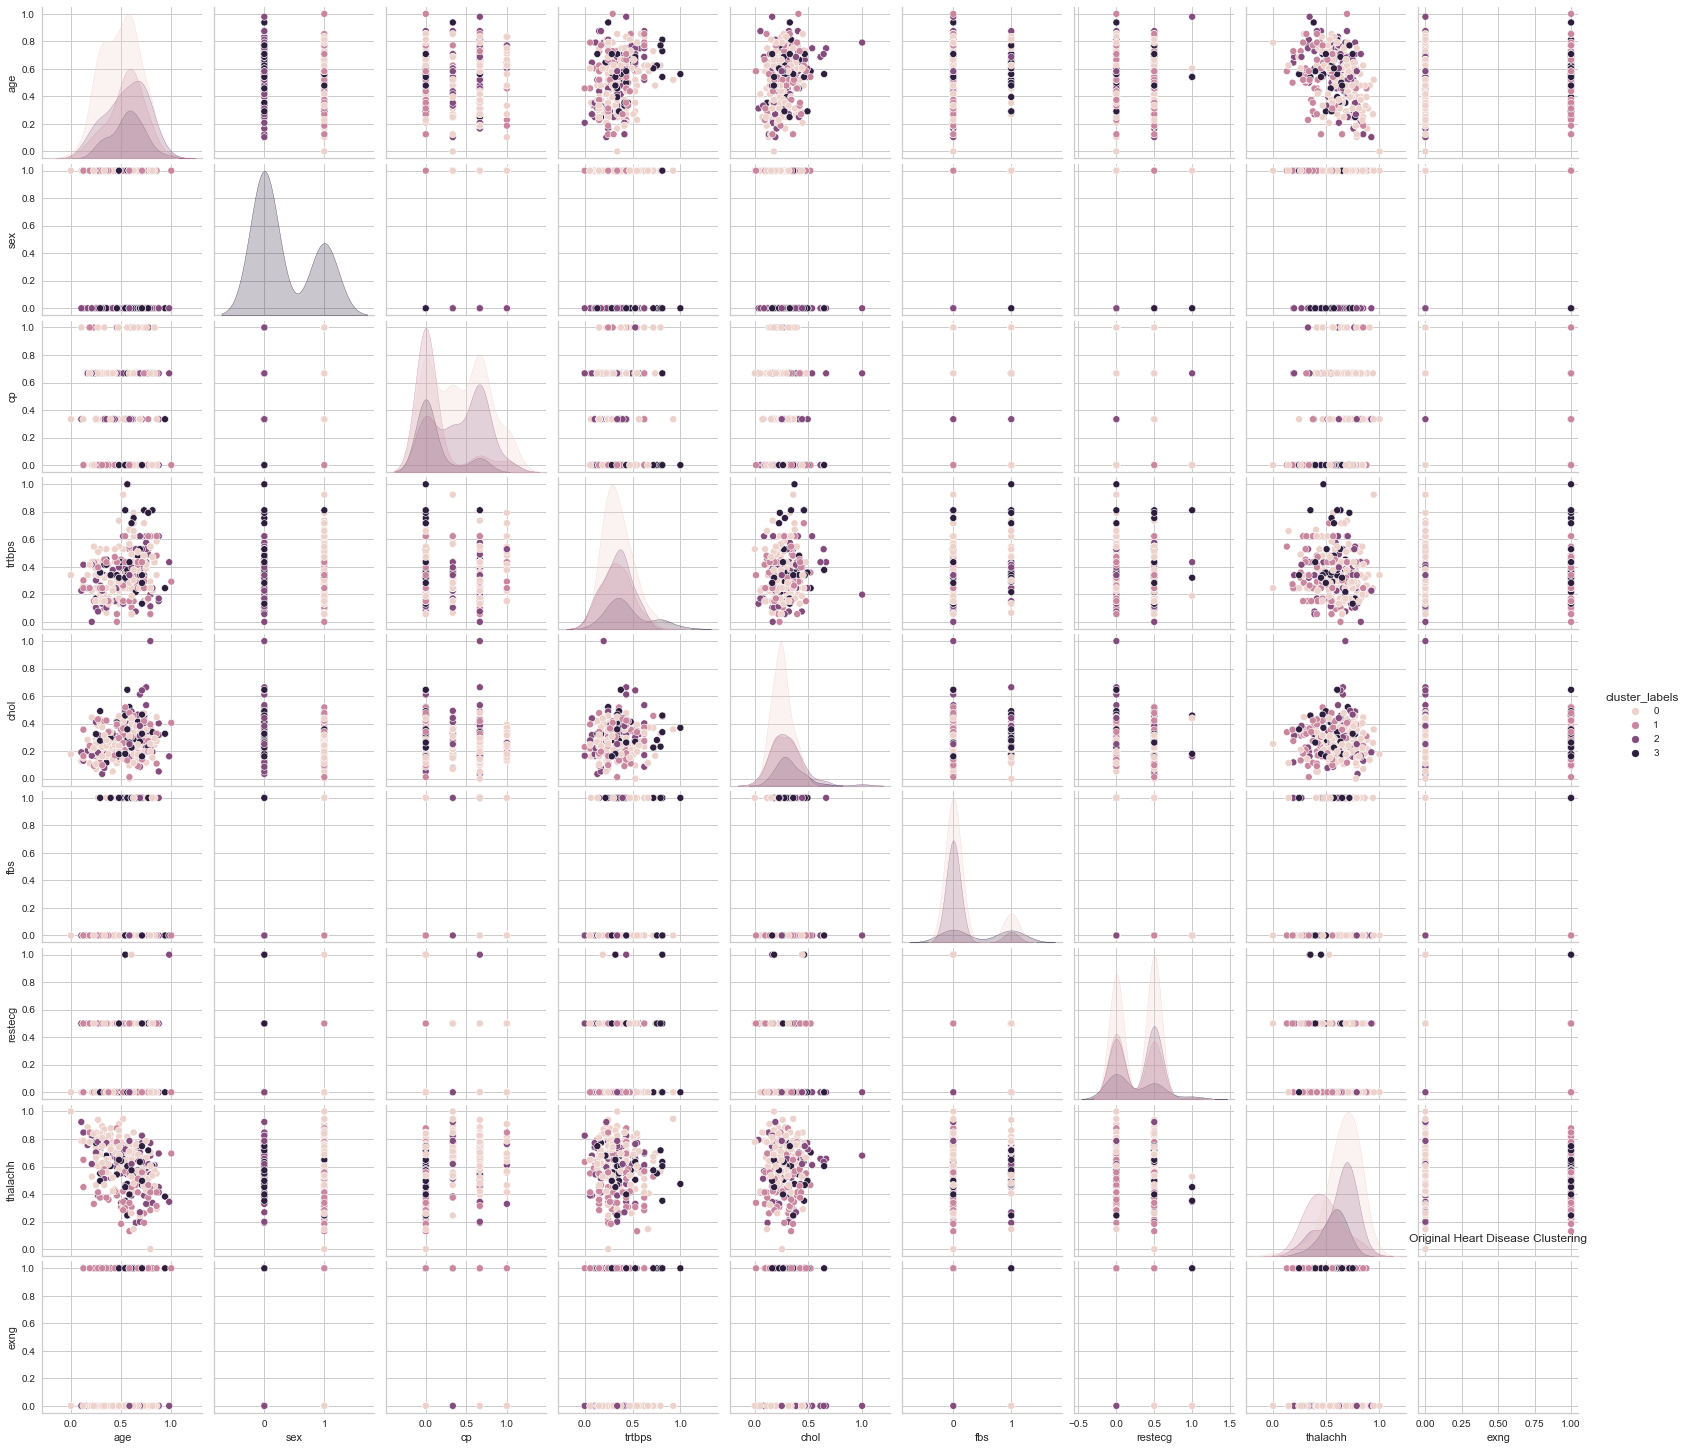

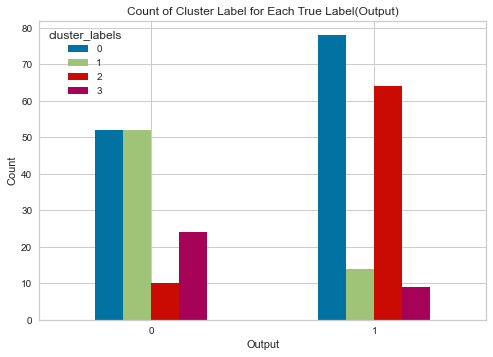

In [896]:
Cluster_label =[]

drawclustersnsonly(KMeans,newX,4,y=y,titlename="Original Heart Disease Clustering")
drawclustersnsonly(GMM,newX,4,y=y,titlename="Original Heart Disease Clustering")


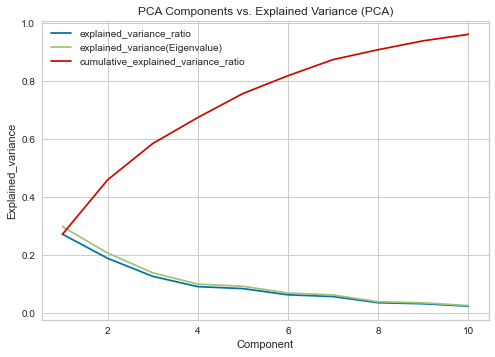

In [897]:
def PCAanalysis(n_component,data):
    pca=PCA(n_component,random_state=1)
    pca_fit=pca.fit(data)
    PC_value=np.arange(pca.n_components_)+1
    
    plt.plot(PC_value,pca.explained_variance_ratio_,label='explained_variance_ratio')
    plt.plot(PC_value,pca.explained_variance_,label='explained_variance(Eigenvalue)')
    plt.plot(PC_value,np.cumsum(pca.explained_variance_ratio_),label='cumulative_explained_variance_ratio')
    plt.title("PCA Components vs. Explained Variance (PCA)")

    plt.xlabel("Component")
    plt.ylabel("Explained_variance")
    plt.legend()
    plt.show

PCAanalysis(10,newX)

pca=PCA(n_components=6,random_state=1)
pca_result=pca.fit(newX).transform(newX)








Text(0.5, 1.0, 'Component vs. Kurtosis (ICA)')

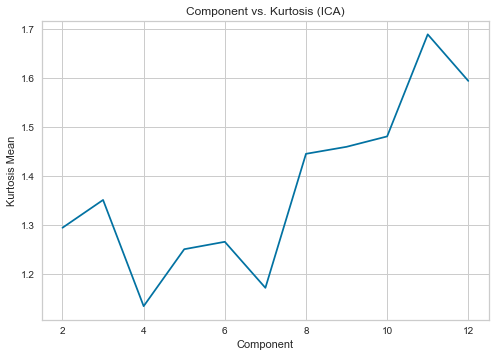

In [898]:
def ICAAnalysis(X):
    component=[]
    kurtosis=[]
    for n in range(2,13):
        component.append(n)

            # Fit ICA
        ica = FastICA(n_components=n, random_state=1)
        S_ica = ica.fit_transform(X)  # Get the independent components

        #PC_value=np.arange(components)+1
        #kurtosis_scores = [kurtosis(S_ica[:, i]) for i in range(S_ica.shape[1])]
        #plt.plot(PC_value,kurtosis_scores)
        final_data=pd.DataFrame(S_ica)
        c=abs(final_data.kurtosis(axis=0)).mean()
        kurtosis.append(c)
    return component,kurtosis,final_data
a,b,final_data=ICAAnalysis(newX)
plt.plot(a,b)
plt.xlabel("Component")
plt.ylabel("Kurtosis Mean")
plt.title("Component vs. Kurtosis (ICA)")




Text(0.5, 1.0, 'Component vs. Reconstruction Error(Random Projection)')

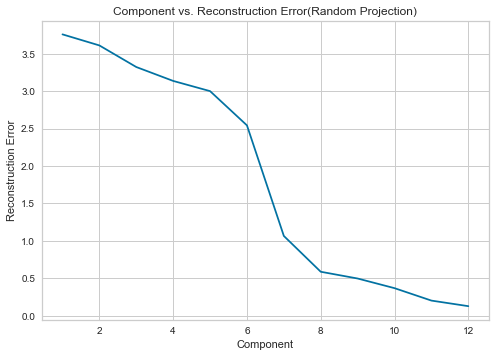

In [899]:
def RP(X):
    component=[]
    reconstructerror=[]
    for n in range(1,13):
        component.append(n)
        transformer = random_projection.GaussianRandomProjection(random_state=1,n_components=n)
        X_2 = transformer.fit_transform(X)
        from numpy import linalg as LA
        X_2back=transformer.inverse_transform(X_2)
#loss = ((X_train - X_projected) ** 2).mean()

        reconstructerror.append(np.sum(((newX - X_2back) ** 2).mean()))
    return component,reconstructerror,X_2

component,reconstructerro,X_2=RP(X=newX)
plt.plot(component,reconstructerro)
plt.xlabel("Component")
plt.ylabel("Reconstruction Error")
plt.title("Component vs. Reconstruction Error(Random Projection)")




Text(0.5, 1.0, 'Component vs. Reconstruction Error(ISOMAP)')

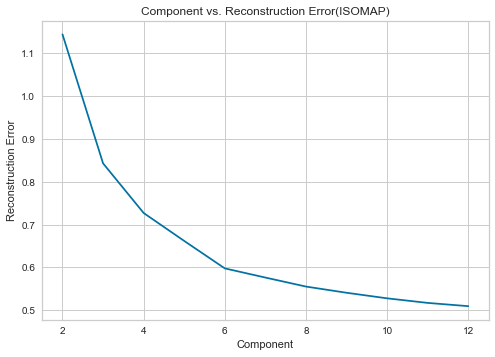

In [900]:
def ISOm(X):
    component=[]
    reconstructerror=[]
    for n in range(2,13):
        component.append(n)
        embedding = Isomap(n_components=n)
        X_transformed = embedding.fit_transform(X)
        reconstructerror.append(embedding.reconstruction_error())
    return component,reconstructerror,X_transformed
#plt.scatter(newX.iloc[:,3],newX.iloc[:,4])
#plt.scatter(X_transformed[:,3],X_transformed[:,4])
component,reconstructerror,X_transformed= ISOm(newX)
plt.plot(component,reconstructerror)
plt.xlabel("Component")
plt.ylabel("Reconstruction Error")
plt.title("Component vs. Reconstruction Error(ISOMAP)")


In [901]:
transformer = random_projection.GaussianRandomProjection(random_state=1,n_components=8)
postRPdata = transformer.fit_transform(newX)
postPCAdata=pca.fit(newX).transform(newX)
embedding = Isomap(n_components=6)
postISOdata = embedding.fit_transform(newX)
ica = FastICA(n_components=11, random_state=1)
post_ICAdata = ica.fit_transform(newX)


x_train,x_test,y_train,y_test=train_test_split(newX,y,test_size=0.2,random_state=1)
def accuracyscore(x_train,x_test,y_train,y_test,DMtype):
    traintime=[]
    starttime=time.time()
    ANNModel= MLPClassifier(random_state=1,alpha=0.1, learning_rate='constant', max_iter= 9, solver= 'adam').fit(x_train,y_train)
    endtime=time.time()
    plt.plot(ANNModel.loss_curve_,label=DMtype)
    plt.legend()
    plt.xlabel("Iteration")
    plt.ylabel("loss")
    plt.title("Loss Curve")

    y_pred=ANNModel.predict(x_test)
    print(accuracy_score(y_pred,y_test))
    print("training time is "+str(endtime-starttime))







In [902]:

print("KMeanRP")
silhouette_printscore(KMeans,postRPdata,[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])
print("KMeanPCA")
silhouette_printscore(KMeans,postPCAdata,[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])

print("KMeanICA")
silhouette_printscore(KMeans,post_ICAdata,[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])

print("KMeanISO")
silhouette_printscore(KMeans,postISOdata,[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])

print("EMRP")
silhouette_printscore(KMeans,postRPdata,[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])
print("EMPCA")
silhouette_printscore(KMeans,postPCAdata,[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])

print("EMICA")
silhouette_printscore(KMeans,post_ICAdata,[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])

print("EMISO")
silhouette_printscore(KMeans,postISOdata,[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])


KMeanRP
For n_clusters = 2 The average silhouette_score is : 0.21574277513762957
For n_clusters = 3 The average silhouette_score is : 0.2999133345329851
For n_clusters = 4 The average silhouette_score is : 0.24997366394118947
For n_clusters = 5 The average silhouette_score is : 0.23116292335664826
For n_clusters = 6 The average silhouette_score is : 0.2591838617157363
For n_clusters = 7 The average silhouette_score is : 0.27611796238551833
For n_clusters = 8 The average silhouette_score is : 0.2824451214677206
For n_clusters = 9 The average silhouette_score is : 0.27566892338065935
For n_clusters = 10 The average silhouette_score is : 0.2783435614950151
For n_clusters = 11 The average silhouette_score is : 0.2668932390049889
For n_clusters = 12 The average silhouette_score is : 0.2554431471584455
For n_clusters = 13 The average silhouette_score is : 0.2555784830664585
For n_clusters = 14 The average silhouette_score is : 0.22637043445296579
For n_clusters = 15 The average silhouette_sc

   output  cluster_labels
0       1               1
1       1               1
2       1               2
3       1               2
4       1               0


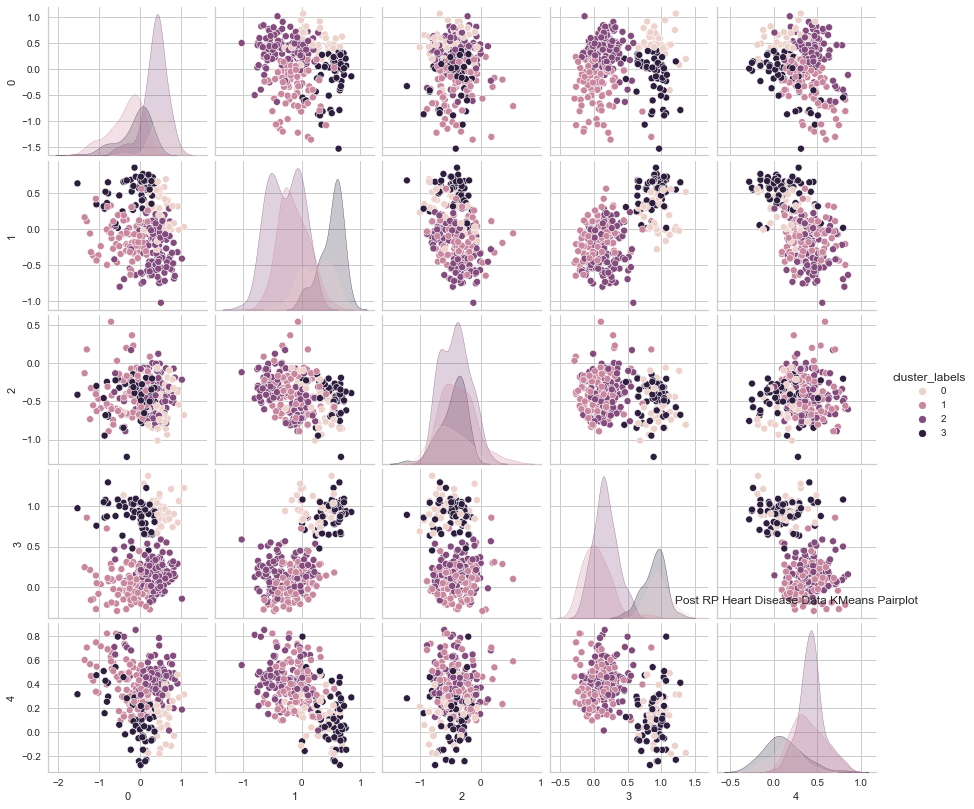

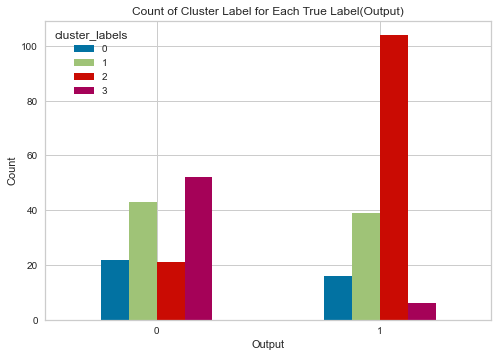

   output  cluster_labels
0       1               3
1       1               3
2       1               2
3       1               0
4       1               1


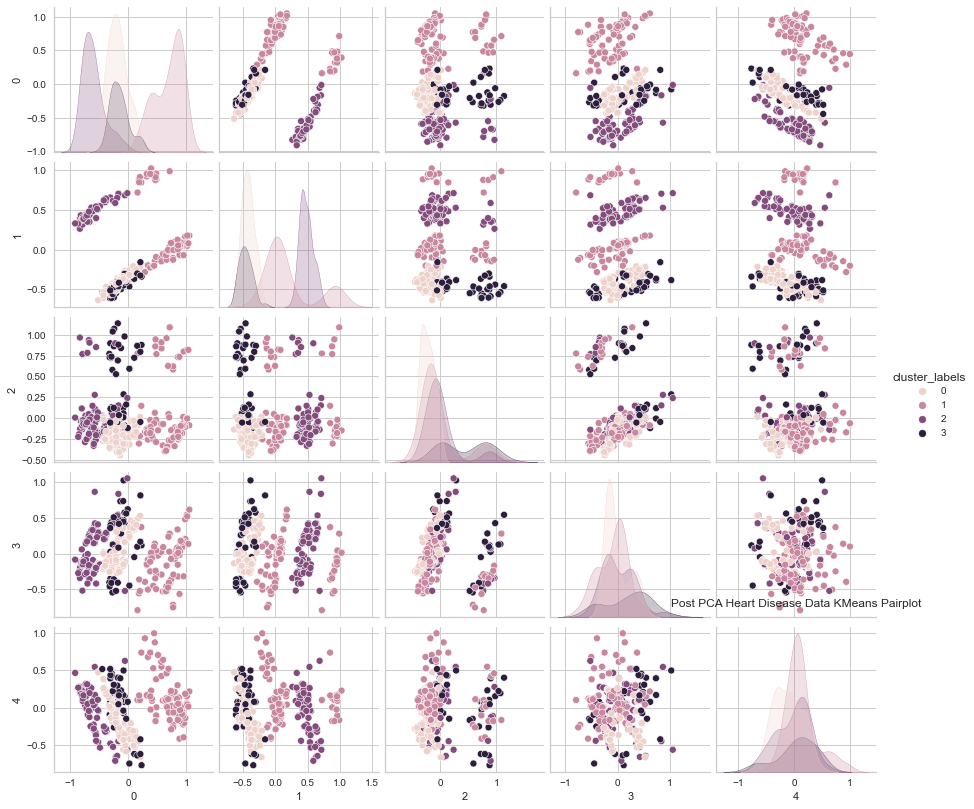

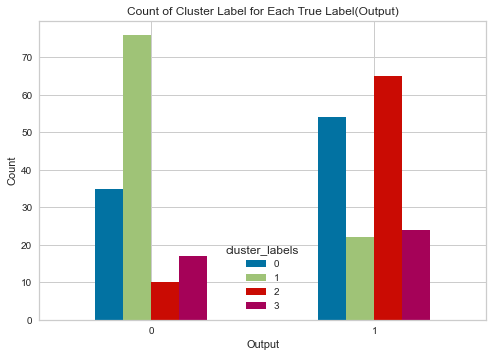

   output  cluster_labels
0       1               1
1       1               3
2       1               2
3       1               0
4       1               3


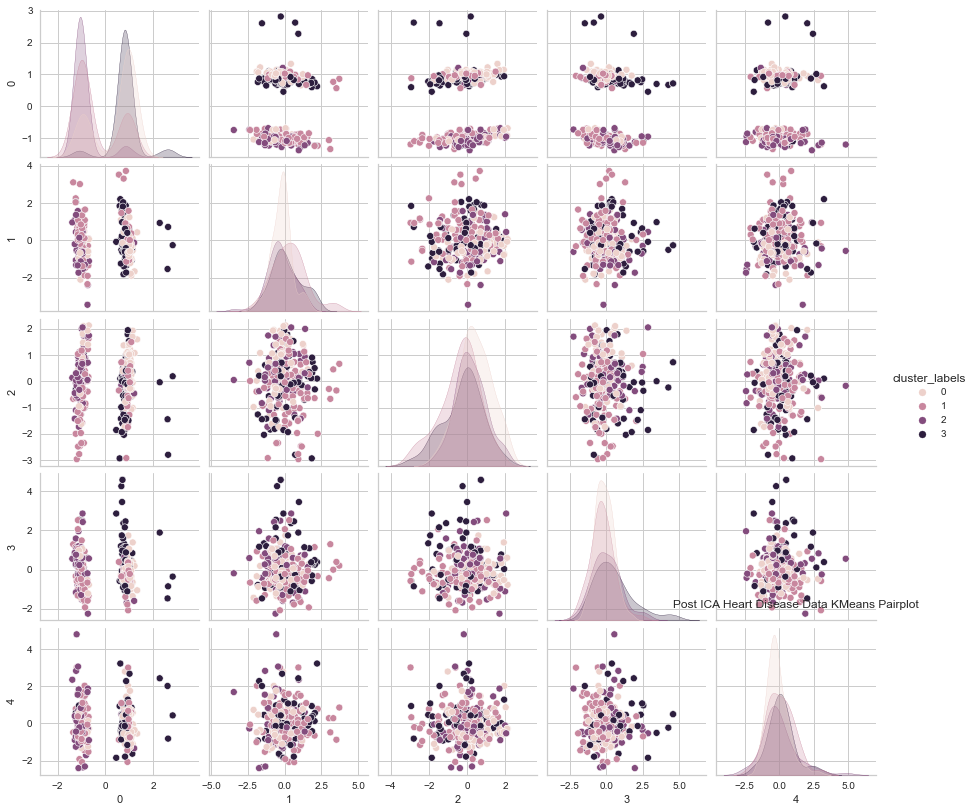

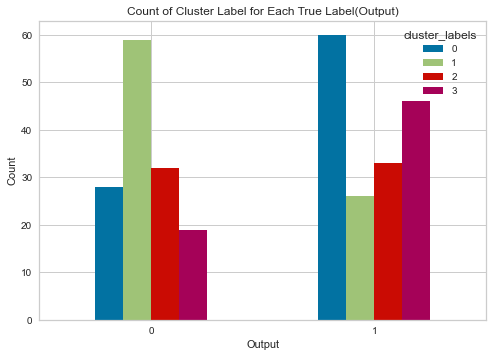

   output  cluster_labels
0       1               3
1       1               0
2       1               2
3       1               0
4       1               2


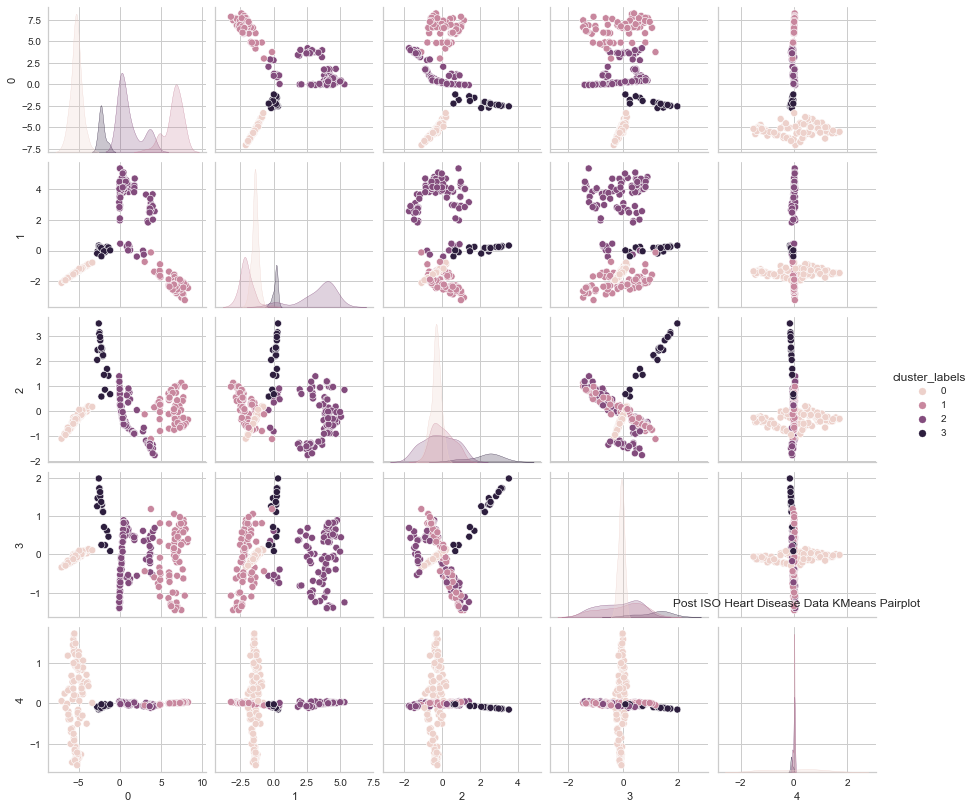

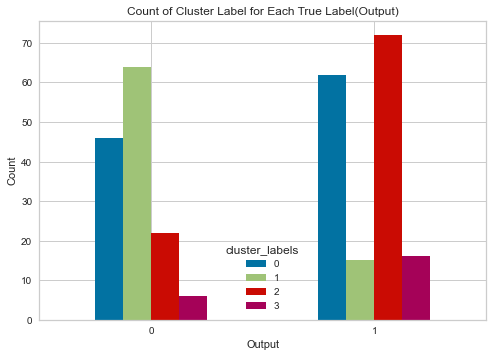

   output  cluster_labels
0       1               1
1       1               1
2       1               2
3       1               2
4       1               0


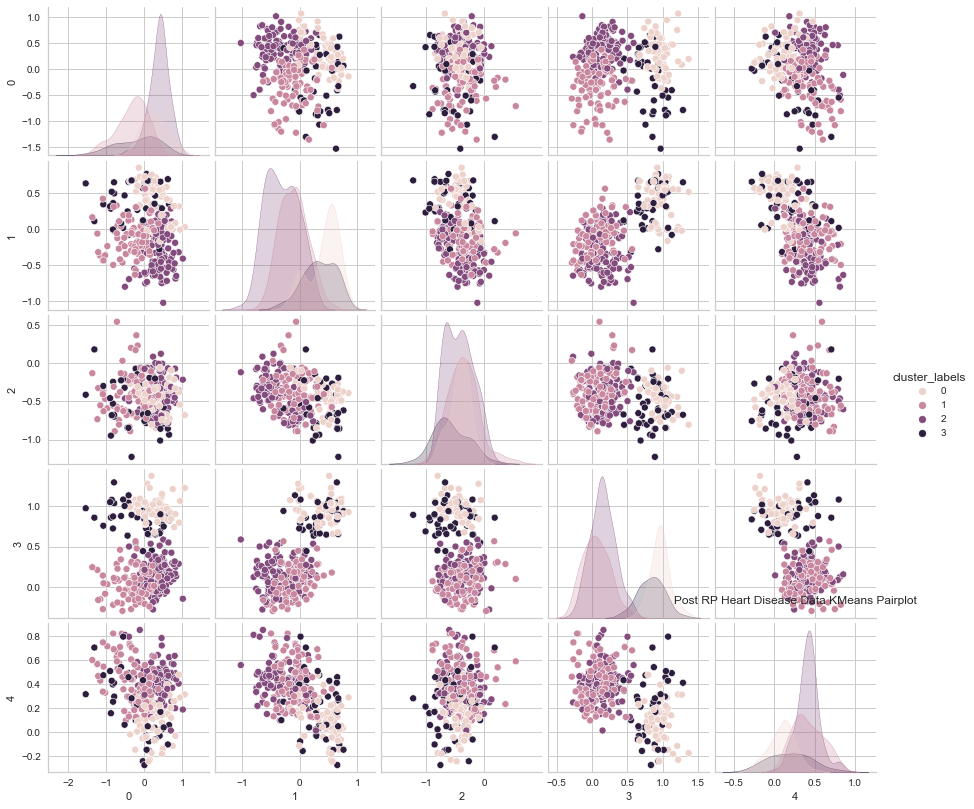

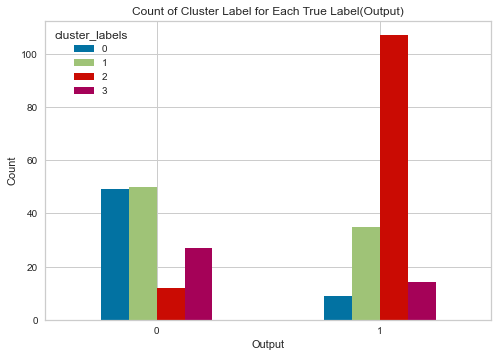

   output  cluster_labels
0       1               3
1       1               0
2       1               2
3       1               0
4       1               1


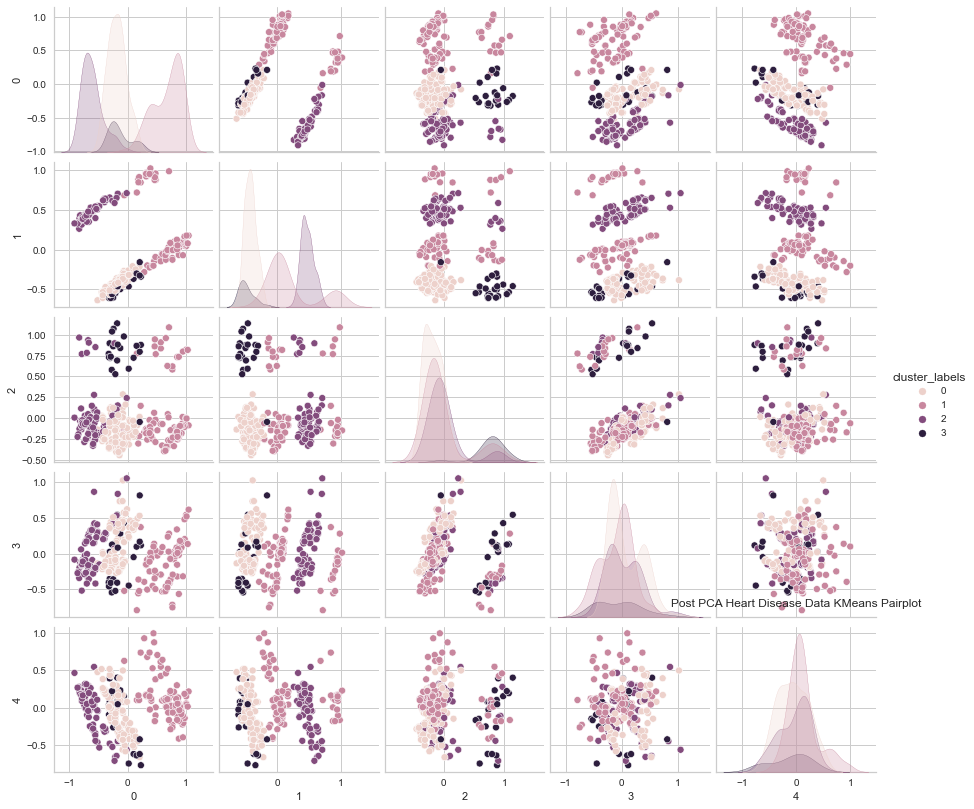

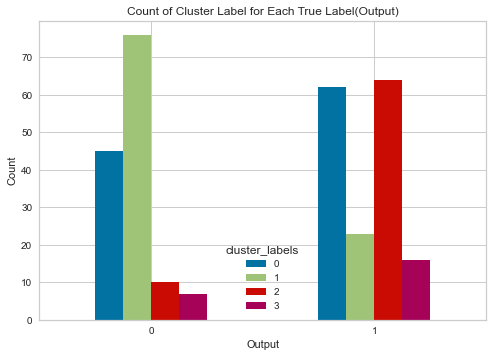

   output  cluster_labels
0       1               1
1       1               1
2       1               3
3       1               0
4       1               3


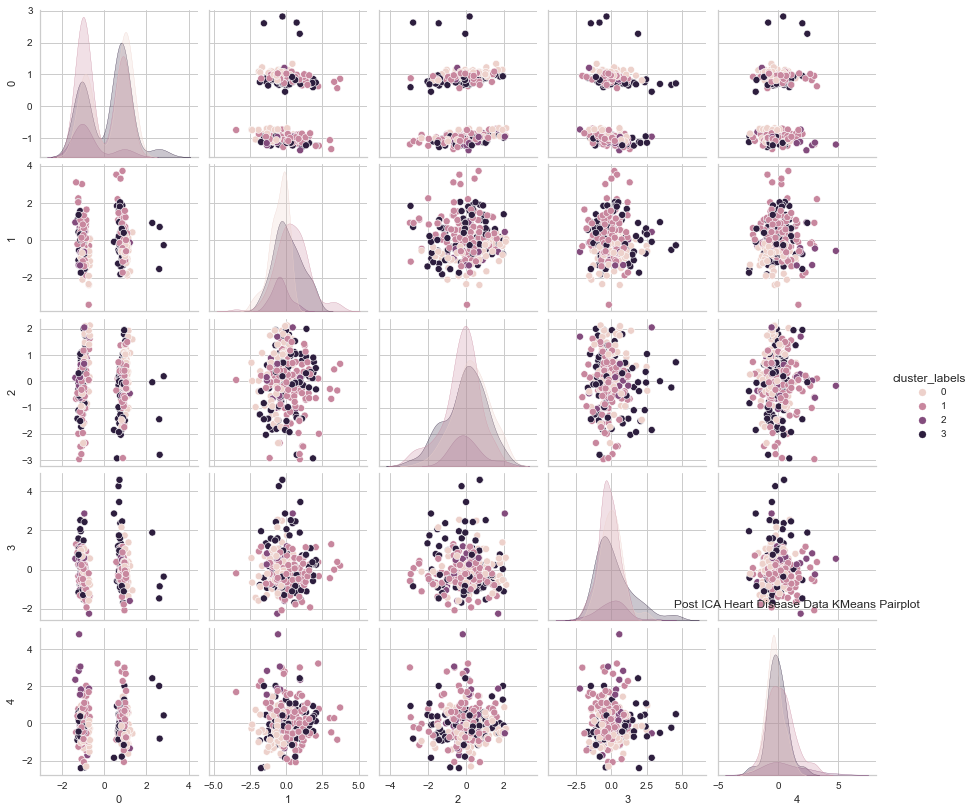

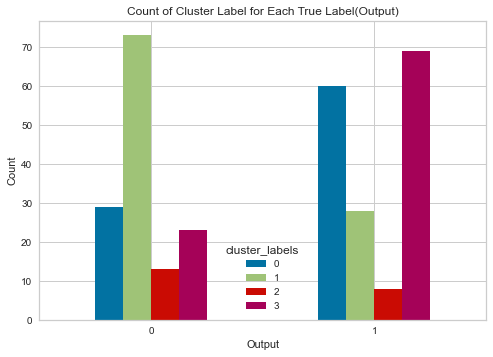

   output  cluster_labels
0       1               3
1       1               0
2       1               2
3       1               0
4       1               2


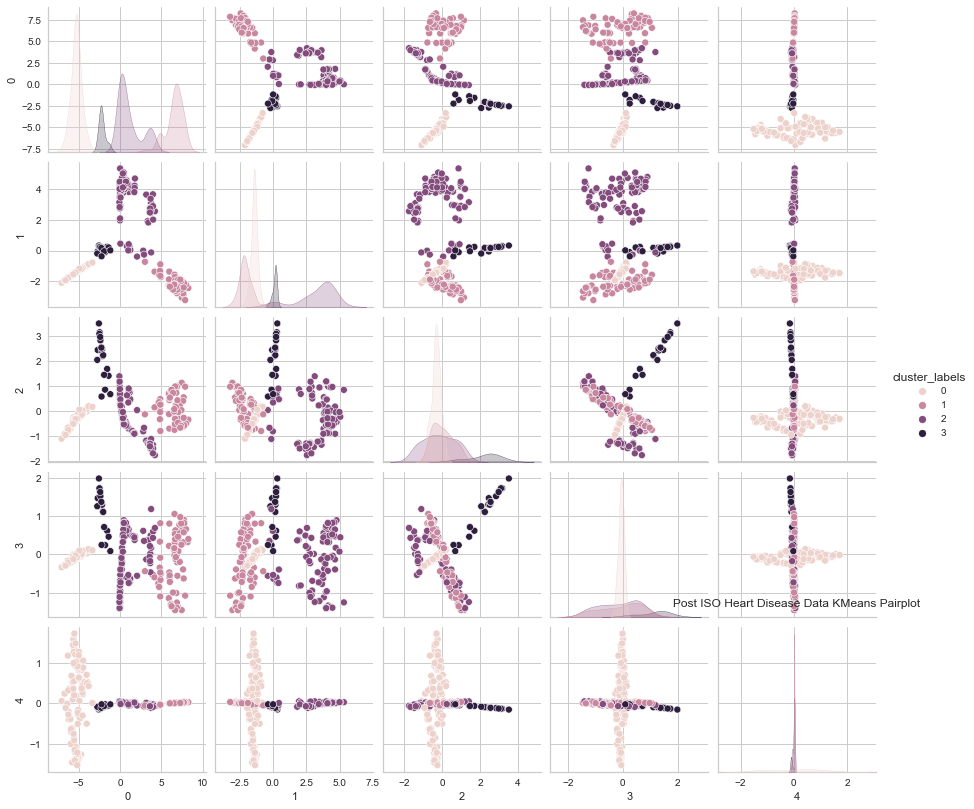

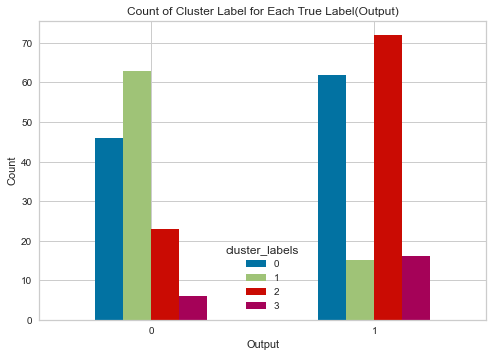

Original
0.639344262295082
training time is 0.009285211563110352
RP
0.7049180327868853
training time is 0.006597757339477539
ISO
0.5901639344262295
training time is 0.019217967987060547
PCA
0.5737704918032787
training time is 0.045844078063964844
ICA
0.6721311475409836
training time is 0.007201194763183594


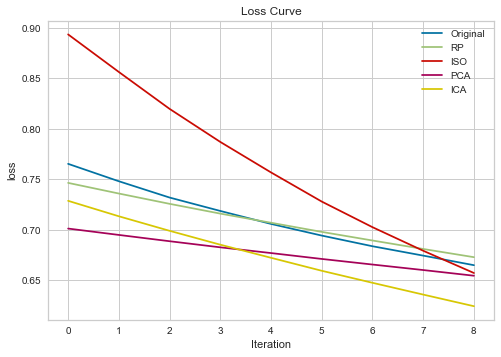

In [903]:


'''
drawcluster(KMeans,postRPdata,3,1,2,False,y,titlename='Post RP Heart Disease Data KMeans Pairplot')
drawcluster(KMeans,postPCAdata,18,1,2,False,y,titlename='Post PCA Heart Disease Data KMeans Pairplot')
drawcluster(KMeans,post_ICAdata,18,1,2,False,y,titlename='Post ICA Heart Disease Data KMeans Pairplot')
drawcluster(KMeans,postISOdata,3,1,2,False,y,titlename='Post ISO Heart Disease Data KMeans Pairplot')
drawcluster(GMM,postRPdata,3,1,2,False,y,titlename='Post RP Heart Disease Data KMeans Pairplot')
drawcluster(GMM,postPCAdata,18,1,2,False,y,titlename='Post PCA Heart Disease Data KMeans Pairplot')
drawcluster(GMM,post_ICAdata,20,1,2,False,y,titlename='Post ICA Heart Disease Data KMeans Pairplot')
drawcluster(GMM,postISOdata,3,1,2,False,y,titlename='Post ISO Heart Disease Data KMeans Pairplot')
'''
drawcluster(KMeans,postRPdata,4,1,2,False,y,titlename='Post RP Heart Disease Data KMeans Pairplot')
drawcluster(KMeans,postPCAdata,4,1,2,False,y,titlename='Post PCA Heart Disease Data KMeans Pairplot')
drawcluster(KMeans,post_ICAdata,4,1,2,False,y,titlename='Post ICA Heart Disease Data KMeans Pairplot')
drawcluster(KMeans,postISOdata,4,1,2,False,y,titlename='Post ISO Heart Disease Data KMeans Pairplot')
drawcluster(GMM,postRPdata,4,1,2,False,y,titlename='Post RP Heart Disease Data KMeans Pairplot')
drawcluster(GMM,postPCAdata,4,1,2,False,y,titlename='Post PCA Heart Disease Data KMeans Pairplot')
drawcluster(GMM,post_ICAdata,4,1,2,False,y,titlename='Post ICA Heart Disease Data KMeans Pairplot')
drawcluster(GMM,postISOdata,4,1,2,False,y,titlename='Post ISO Heart Disease Data KMeans Pairplot')

print("Original")
accuracyscore(x_train,x_test,y_train,y_test,DMtype="Original")

print ("RP")
x_train,x_test,y_train,y_test=train_test_split(postRPdata,y,test_size=0.2,random_state=1)
accuracyscore(x_train,x_test,y_train,y_test,DMtype="RP")

print ("ISO")
x_train,x_test,y_train,y_test=train_test_split(postISOdata,y,test_size=0.2,random_state=1)
accuracyscore(x_train,x_test,y_train,y_test,DMtype="ISO")

print ("PCA")
x_train,x_test,y_train,y_test=train_test_split(postPCAdata,y,test_size=0.2,random_state=1)
accuracyscore(x_train,x_test,y_train,y_test,DMtype="PCA")
print ("ICA")
x_train,x_test,y_train,y_test=train_test_split(post_ICAdata,y,test_size=0.2,random_state=1)
accuracyscore(x_train,x_test,y_train,y_test,DMtype="ICA")

In [912]:
clusterer = KMeans(3, random_state=2)
cluster_labels = clusterer.fit_predict(newX)
newest= np.concatenate((newX, cluster_labels[:, np.newaxis]), axis=1)
x_train,x_test,y_train,y_test=train_test_split(newest,y,test_size=0.2,random_state=1)
ANNModel= MLPClassifier(random_state=1,alpha=0.0001, learning_rate='constant', max_iter= 7, solver= 'adam').fit(x_train,y_train)
y_pred=ANNModel.predict(x_test)
print(accuracy_score(y_pred,y_test))


x_train,x_test,y_train,y_test=train_test_split(newX,y,test_size=0.2,random_state=1)
ANNModel= MLPClassifier(random_state=1,alpha=0.0001, learning_rate='constant', max_iter= 7, solver= 'adam').fit(x_train,y_train)
y_pred=ANNModel.predict(x_test)
print(accuracy_score(y_pred,y_test))

clusterer = GMM(3, random_state=1)
cluster_labels = clusterer.fit_predict(newX)
newest= np.concatenate((newX, cluster_labels[:, np.newaxis]), axis=1)
x_train,x_test,y_train,y_test=train_test_split(newest,y,test_size=0.2,random_state=1)
ANNModel= MLPClassifier(random_state=1,alpha=0.0001, learning_rate='constant', max_iter= 7, solver= 'adam').fit(x_train,y_train)
y_pred=ANNModel.predict(x_test)
print(accuracy_score(y_pred,y_test))


0.4262295081967213
0.6885245901639344
0.4426229508196721


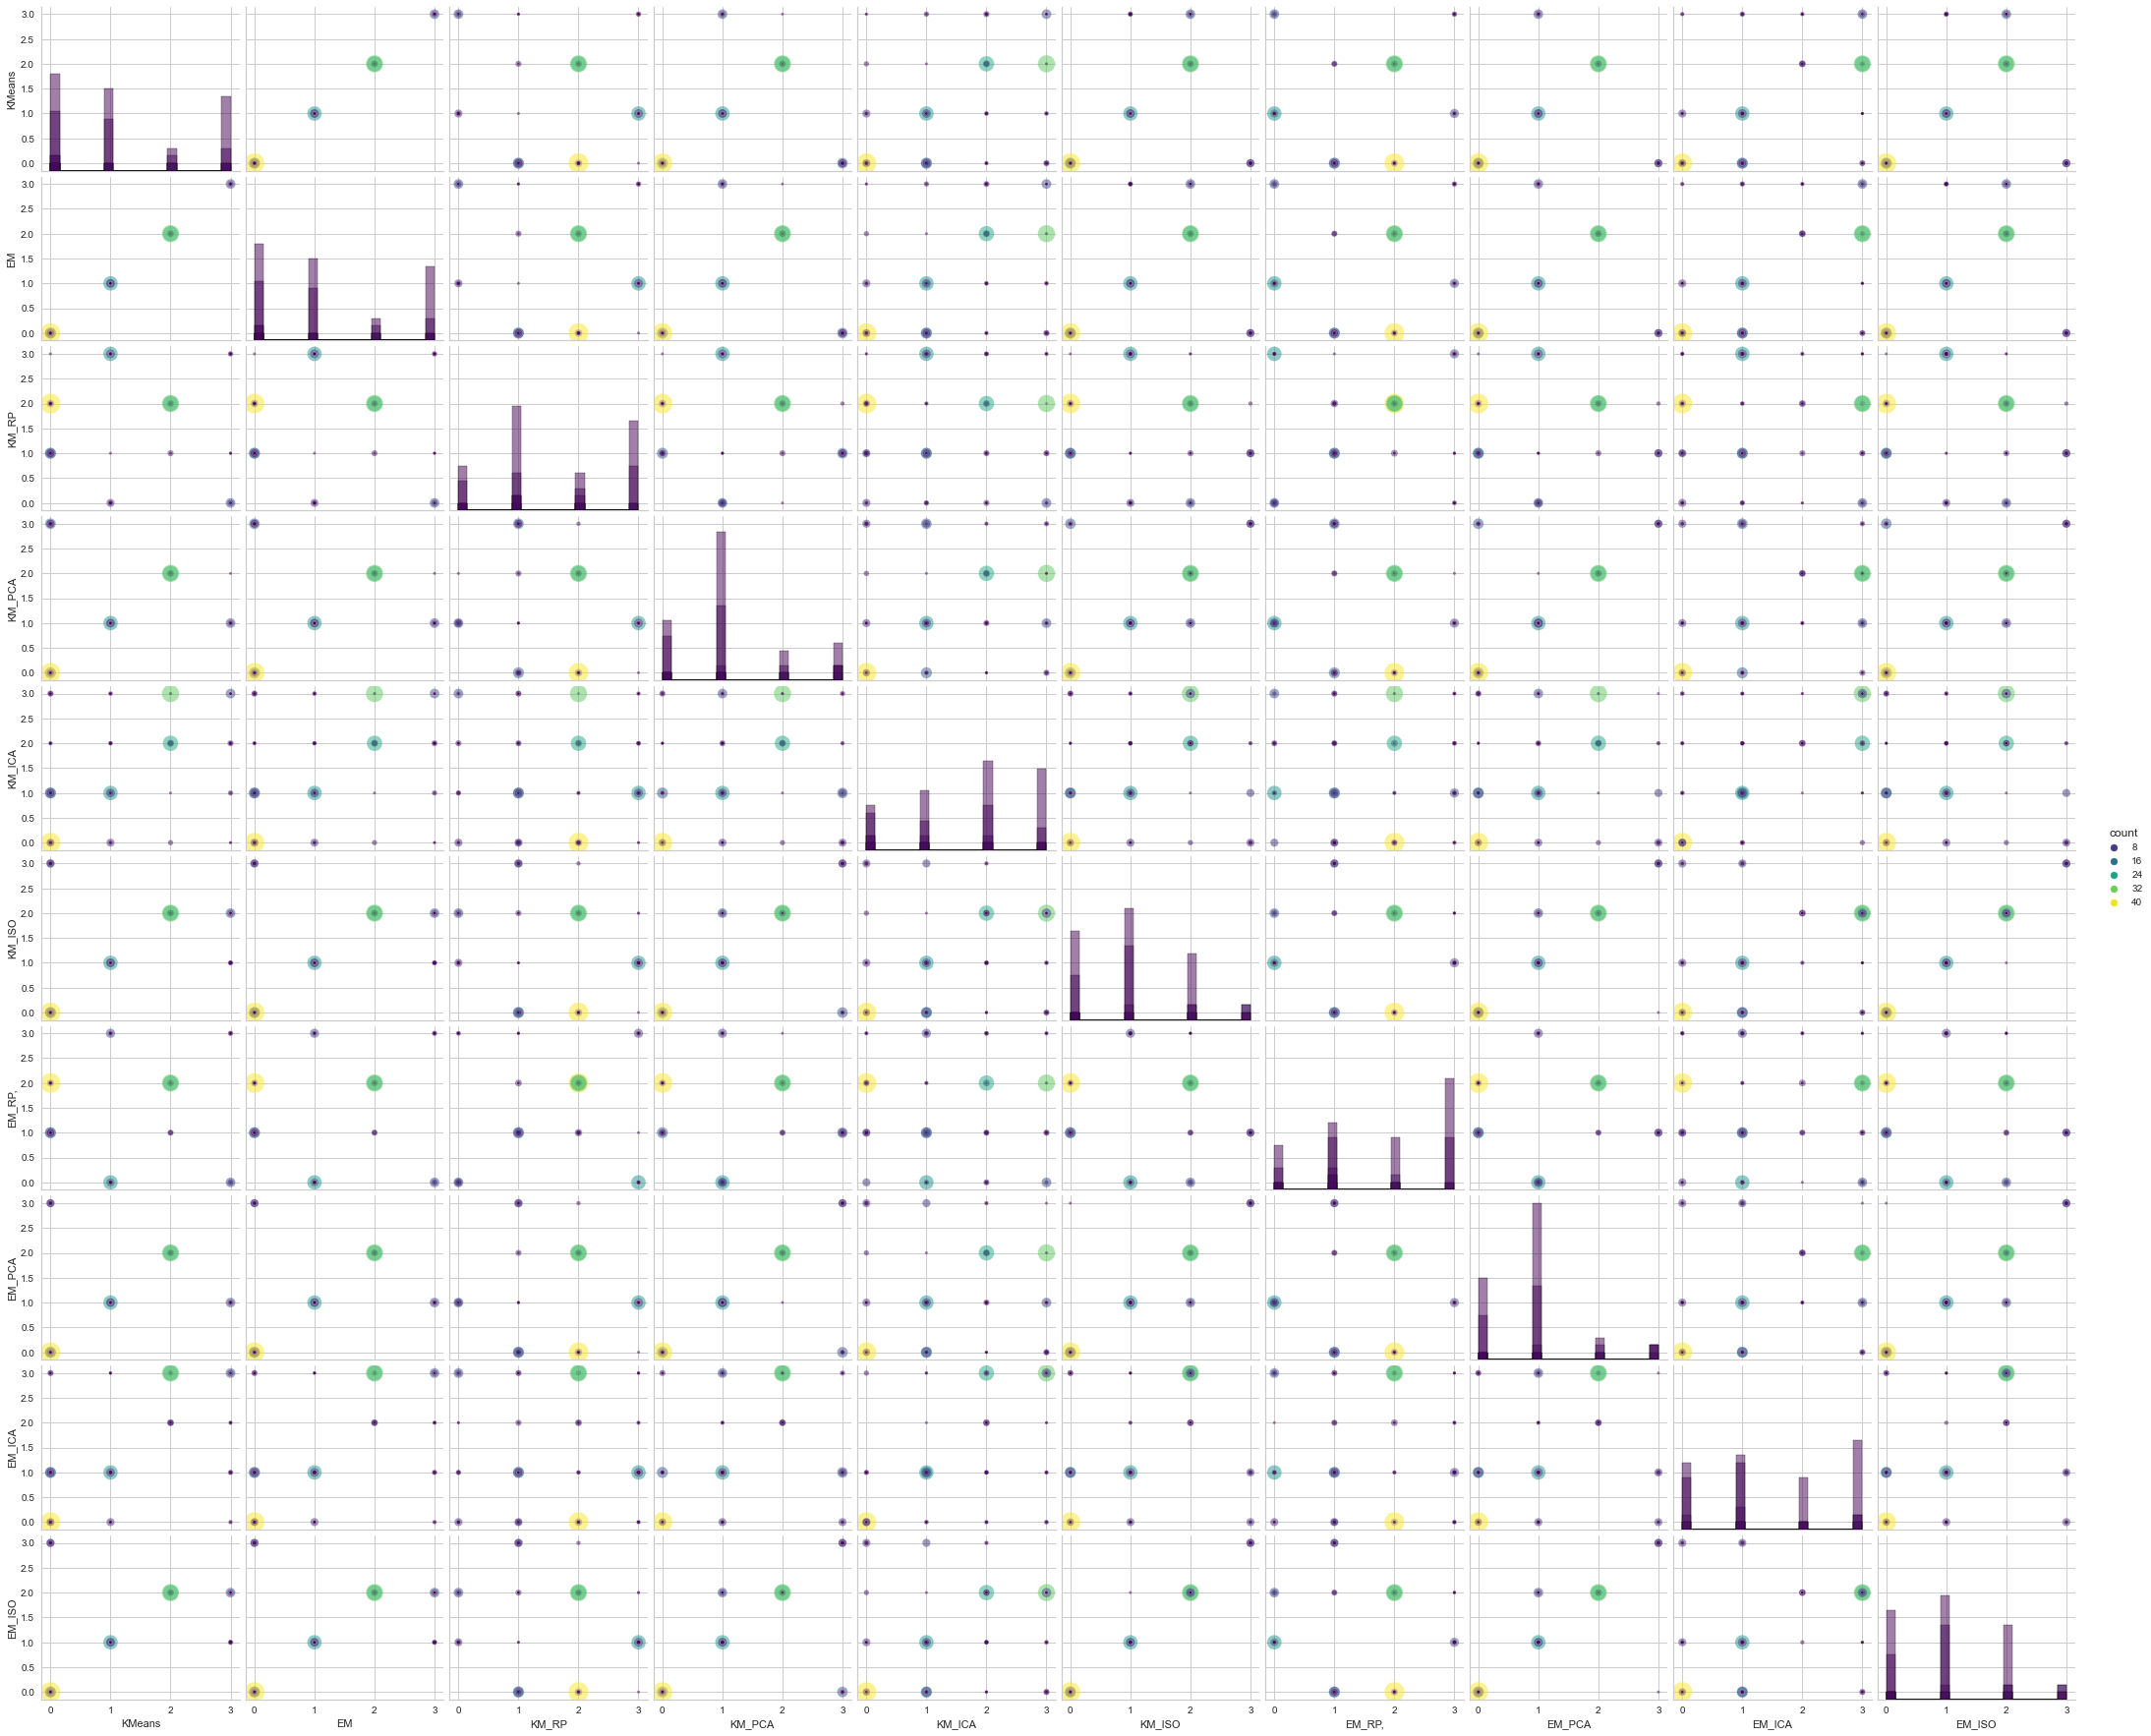

In [905]:

numpy_data= np.array(Cluster_label)

Cluster_label_df_withall = pd.DataFrame(data=numpy_data).T 

Cluster_label_df_withall.columns = ["KMeans","EM","KM_RP","KM_PCA","KM_ICA","KM_ISO","EM_RP,","EM_PCA","EM_ICA","EM_ISO"]
counts = Cluster_label_df_withall.groupby(list(Cluster_label_df_withall.columns)).size().reset_index(name='count')

sns.pairplot(counts, hue='count', palette='viridis', height=2.5, aspect=1.2, diag_kind='hist', diag_kws={'bins': 20}, plot_kws={'alpha': 0.5, 's': counts['count']*10})


plt.show()